# Global analysis of Qatar World Cup 2022

#### An overwiew of the 2022 Football World Cup edition, and an interesting view of the **sportive** challenges the nations and players faced during this particular edition.

<span style="color:pink">By Kevin NICOLAS</span>

## <span style="color:#fc0388">Import Data</span>

I built myself the 3 data sources used in this analysis, that came from [fbref.com](https://fbref.com/en/comps/1/schedule/World-Cup-Scores-and-Fixtures), [flashscore.fr](https://www.flashscore.fr) and [wikipedia.com](https://en.wikipedia.org/wiki/FIFA_World_Cup).

In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [64]:
global_matches = pd.read_csv('data/global_matches_qatar2022.csv', sep=";")
details_teams = pd.read_csv('data/details_teams_qatar2022.csv', sep=";")
details_match = pd.read_csv('data/details_match_qatar2022.csv', sep=";")

In [65]:
details_teams.columns

Index(['Country', 'Player', 'Pos', 'Age', 'Club', 'MP', 'Starts', 'Min', '90s',
       'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'Gls--90min', 'Ast--90min', 'G+A--90min', 'G-PK--90min',
       'G+A-PK--90min', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'xG--90min',
       'xAG--90min', 'xG+xAG--90min', 'npxG--90min', 'npxG+xAG--90min'],
      dtype='object')

---

## <span style="color:#fc0388">Players of the World Cup</span>

Here are some players who have impressed (or not) this World Cup, based on their __performances__.

In [66]:
bestscorer = details_teams[details_teams['Gls'] == details_teams['Gls'].max()][['Player', 'Country', 'Gls', 'MP', 'Gls--90min']]
bestassist = details_teams[details_teams['Ast'] == details_teams['Ast'].max()][['Player', 'Country', 'Ast', 'MP', 'Ast--90min']]
bestassist.sort_values(by=['Ast--90min'], inplace=True, ascending=False)
print("Best scorer:\n", bestscorer, "\n\n", "Best assists:\n", bestassist)

Best scorer:
           Player Country  Gls  MP  Gls--90min
0  Kylian Mbappé  France 8.00   7        1.20 

 Best assists:
                Player    Country  Ast  MP  Ast--90min
3     Bruno Fernandes   Portugal 3.00   4        0.76
2          Harry Kane    England 3.00   5        0.67
27  Antoine Griezmann     France 3.00   7        0.50
8        Ivan Perišić    Croatia 3.00   7        0.40
1        Lionel Messi  Argentina 3.00   7        0.39


In [67]:
decisiveplayer = details_teams[details_teams['G+A'] == details_teams['G+A'].max()][['Player', 'Country', 'G+A', 'Gls', 'Ast', 'MP', 'G+A-PK--90min']]
print(decisiveplayer)

          Player    Country  G+A  Gls  Ast  MP  G+A-PK--90min
0  Kylian Mbappé     France   10 8.00 2.00   7           1.20
1   Lionel Messi  Argentina   10 7.00 3.00   7           0.78


In [68]:
youngestplayer = details_teams[details_teams['Age'] == details_teams['Age'].min()][['Player', 'Country', 'Age', 'MP', 'Min', 'Starts', 'G+A']]
youngestplayer.sort_values(by=['MP'], inplace=True, ascending=False)
print(youngestplayer)

                Player     Country  Age  MP    Min  Starts  G+A
117               Gavi       Spain   17   4 284.00       4    1
278   Jewison Bennette  Costa Rica   17   3 103.00       1    0
190        Garang Kuol   Australia   17   2  37.00       0    0
374  Youssoufa Moukoko     Germany   17   1   1.00       0    0


In [69]:
oldestplayer = details_teams[details_teams['Age'] == details_teams['Age'].max()][['Player', 'Country', 'Age', 'MP', 'Min', 'Starts', 'G+A']]
oldestplayer.sort_values(by=['Min'], inplace=True, ascending=False)
print(oldestplayer)

               Player   Country  Age  MP    Min  Starts  G+A
104              Pepe  Portugal   39   4 360.00       4    1
266  Atiba Hutchinson    Canada   39   3 159.00       2    0
232        Dani Alves    Brazil   39   2 118.00       1    0
752    Eiji Kawashima     Japan   39   0    NaN       0    0
764  Alfredo Talavera    Mexico   39   0    NaN       0    0


In [70]:
details_teams["effectiveness"] = details_teams["G+A"] - (details_teams["xG"] + details_teams["xAG"])

In [71]:
most_decisive_player = details_teams[details_teams['effectiveness'] == details_teams['effectiveness'].max()][['Player', 'Country','effectiveness', 'Min']]
most_disappointing_player = details_teams[details_teams['effectiveness'] == details_teams['effectiveness'].min()][['Player', 'Country','effectiveness', 'Gls', 'Ast', 'MP', 'Min']]
print("Most decisive player:\n", most_decisive_player, "\n\n", "Most disappointing player:\n", most_disappointing_player)

Most decisive player:
           Player Country  effectiveness    Min
0  Kylian Mbappé  France           3.50 598.00 

 Most disappointing player:
                Player    Country  effectiveness  Gls  Ast  MP    Min
175  Lautaro Martínez  Argentina          -1.90 0.00 0.00   6 241.00


In [72]:
all_subs = details_match[details_match['Nature'] == "Entrance"]
all_goals_and_assists = details_match[details_match['Nature'].isin(["Goal", "Assist"])]
all_goals = details_match[details_match['Nature'] == "Goal"]

In [73]:
details_match['Nature'].unique()

array(['Offside Goal', 'Yellow Card', 'Goal', 'Assist', 'Substitute',
       'Entrance', 'Substitute Injury', 'Missed Penalty',
       'Yellow Card (Outside)', 'Red Card', 'Red Card (Offside)',
       'Own Goal', 'Missed Penalty (PS)', 'Scored Penalty (PS)'],
      dtype=object)

In [74]:
subs_who_scored_or_assist = pd.merge(all_subs, all_goals_and_assists, how="left", on=["Match", "Player"]).dropna()
subs_who_scored_or_assist = pd.merge(subs_who_scored_or_assist, details_teams[["Country", "Player"]], how="left", on="Player")
subs_who_scored_or_assist = subs_who_scored_or_assist.groupby("Player").size()
subs_who_scored_or_assist = subs_who_scored_or_assist[subs_who_scored_or_assist == subs_who_scored_or_assist.max()].to_frame()
subs_who_scored_or_assist = subs_who_scored_or_assist.rename({0: "G+A"}, axis='columns')
subs_who_scored_or_assist = pd.merge(subs_who_scored_or_assist, details_teams[['Player', 'MP', 'Min', 'Gls', 'Ast']], how="left", on="Player")
subs_who_scored_or_assist.sort_values(by="MP")

,Player,G+A,MP,Min,Gls,Ast
0,Niclas Füllkrug,3,3,69.00,2.00,1.00
1,Álvaro Morata,3,4,185.00,3.00,1.00


In [75]:
details_teams['League'] = details_teams["Club"].str.split(" ", 1, expand=True)[0]
all_goals = pd.merge(all_goals, details_teams[['Player', 'Country', 'League']], how="left", on="Player")
scoring_leagues = all_goals.groupby("League").size().sort_values(ascending=False)
scoring_leagues

League
1.eng    37
1.fr     27
1.es     16
1.it     15
1.de     15
1.pt      8
1.tr      8
1.nl      7
1.sa      5
1.kr      4
1.hr      3
1.mx      3
1.cr      2
1.ir      2
1.us      2
1.au      2
1.br      2
1.qa      2
2.eng     1
2.de      1
1.at      1
1.sct     1
1.rs      1
2.jp      1
dtype: int64

In [76]:
len(scoring_leagues)

24

---

## <span style="color:#fc0388">Nations of the World Cup</span>

Here are some nations that made a great (or not so) 2022 World Cup, based on their __performances__.

In [77]:
def who_wins_nation(match) :
    if match['Score_x'] > match['Score_y']:
        return match['Team_x']
    elif match['Score_x'] < match['Score_y']:
        return match['Team_y']
    else:
        return "Draw"

In [78]:
teams_home = global_matches[global_matches['OrderTeam'] == "H"][["Match", "Team", "Continent", "Score", "Shots", "Shots OT", "Phase"]]
teams_away = global_matches[global_matches['OrderTeam'] == "A"][["Match", "Team", "Continent", "Score", "Shots", "Shots OT", "Phase"]]

In [79]:
results_matches = pd.merge(teams_home, teams_away, how="left", on=["Match", "Phase"])
results_matches["Winning Team"] = results_matches.apply(who_wins_nation, axis=1)
results_matches.groupby("Winning Team").size().sort_values(ascending=False).drop("Draw")

Winning Team
France            5
Argentina         4
Brazil            3
Portugal          3
Netherlands       3
Morocco           3
England           3
Australia         2
Switzerland       2
Senegal           2
Japan             2
Croatia           2
Ghana             1
Iran              1
Germany           1
Korea Republic    1
Mexico            1
Ecuador           1
Poland            1
Costa Rica        1
Saudi Arabia      1
Cameroon          1
Spain             1
Belgium           1
Tunisia           1
USA               1
Uruguay           1
dtype: int64

In [80]:
def who_wins_continent(match) :
    if match['Score_x'] > match['Score_y']:
        return match['Continent_x']
    elif match['Score_x'] < match['Score_y']:
        return match['Continent_y']
    else:
        return "Draw"

In [81]:
results_matches["Winning Continent"] = results_matches.apply(who_wins_continent, axis=1)
winning_continent = results_matches.groupby("Winning Continent").size().sort_values(ascending=False).drop("Draw")
winning_continent

Winning Continent
Europe     22
America    12
Africa      8
Asia        5
Oceania     2
dtype: int64

In [82]:
winning_continent = winning_continent.reset_index(name='size')
winning_continent.columns=["Winning Continent", "Count"]
winning_continent

,Winning Continent,Count
0,Europe,22
1,America,12
2,Africa,8
3,Asia,5
4,Oceania,2


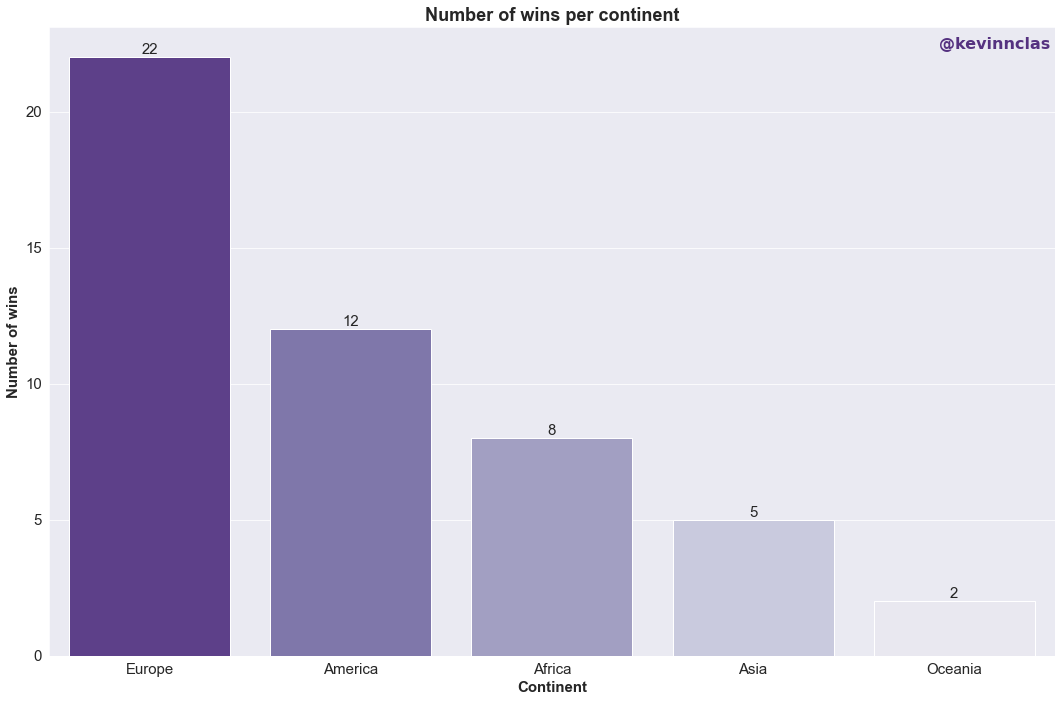

In [83]:
mpl.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10), tight_layout=True)
sns.set_style("darkgrid")

# create the bar plot
result_plot = sns.barplot(x='Winning Continent', y='Count', data=winning_continent, palette=sns.color_palette("Purples", len(winning_continent))[::-1], order = winning_continent.sort_values(ascending=False, by='Count', inplace=True))

# loop through the bars, and add the value of 'Count' on the top of the bar
for i in result_plot.containers:
    result_plot.bar_label(i,)

# add labels and title
plt.xlabel('Continent').set_weight("bold")
plt.ylabel('Number of wins').set_weight("bold")
plt.title('Number of wins per continent').set_weight("bold")
plt.annotate("@kevinnclas", xy=(1, 1), xycoords='axes fraction', fontsize=16,
             xytext=(-5, -10), textcoords='offset points', fontweight='bold', fontfamily='Open Sans', color='#553280',
             ha='right', va='top')


# show the plot
plt.show()

In [84]:
winning_continent['Number of nations'] = [13, 8, 5, 5, 1]
winning_continent['Count normalized'] = winning_continent['Count'] / winning_continent['Number of nations']
winning_continent

,Winning Continent,Count,Number of nations,Count normalized
0,Europe,22,13,1.69
1,America,12,8,1.50
2,Africa,8,5,1.60
3,Asia,5,5,1.00
4,Oceania,2,1,2.00


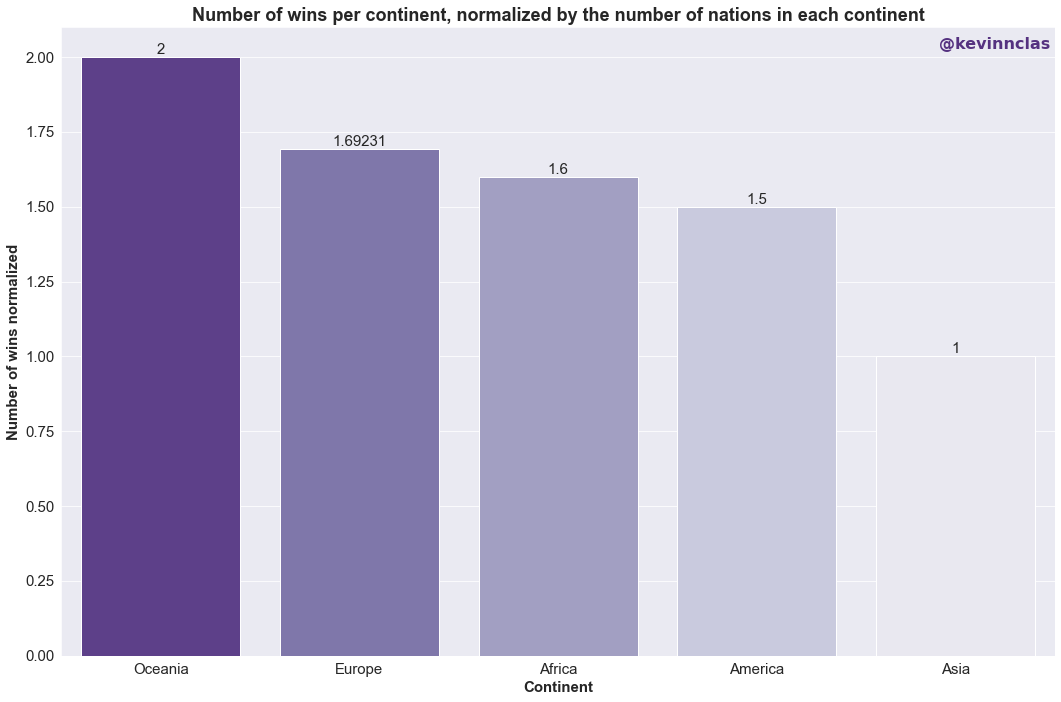

In [85]:
mpl.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10), tight_layout=True)
sns.set_style("darkgrid")

winning_continent.sort_values(ascending=False, by='Count normalized', inplace=True)
# create the bar plot
result_plot = sns.barplot(x='Winning Continent', y='Count normalized', data=winning_continent, palette=sns.color_palette("Purples", len(winning_continent))[::-1])

# loop through the bars, and add the value of 'Count' on the top of the bar
for i in result_plot.containers:
    result_plot.bar_label(i,)

# add labels and title
plt.xlabel('Continent').set_weight("bold")
plt.ylabel('Number of wins normalized').set_weight("bold")
plt.title('Number of wins per continent, normalized by the number of nations in each continent').set_weight("bold")
plt.annotate("@kevinnclas", xy=(1, 1), xycoords='axes fraction', fontsize=16,
             xytext=(-5, -10), textcoords='offset points', fontweight='bold', fontfamily='Open Sans', color='#553280',
             ha='right', va='top')


# show the plot
plt.show()

In [86]:
offensiveness = global_matches.groupby("Team")[['Shots', 'Shots OT', "Score"]].sum()
offensiveness['% OT'] = ((offensiveness['Shots OT'] / offensiveness['Shots']) * 100).round(2)
offensiveness['Convertness'] = ((offensiveness['Score'] / offensiveness['Shots OT']) * 100).round(2)
offensiveness.sort_values(ascending=False, by=["Score", "Shots OT", "Shots"])[["Score", "Shots OT", "Shots", "% OT", "Convertness"]] 

,Score,Shots OT,Shots,% OT,Convertness
Team,,,,,
France,16,33,100,33.00,48.48
Argentina,15,41,95,43.16,36.59
England,13,27,61,44.26,48.15
Portugal,12,24,64,37.50,50.00
Netherlands,10,16,42,38.10,62.50
Spain,9,16,48,33.33,56.25
Brazil,8,36,83,43.37,22.22
Croatia,8,26,79,32.91,30.77
Germany,6,23,68,33.82,26.09


In [87]:
defensiveness_X = results_matches.groupby("Team_x")[['Shots_y', 'Shots OT_y', "Score_y"]].sum()
defensiveness_Y = results_matches.groupby("Team_y")[['Shots_x', 'Shots OT_x', "Score_x"]].sum()
defensiveness = pd.merge(defensiveness_X, defensiveness_Y, how="outer", left_index=True, right_index=True)
defensiveness['Shots conceded'] = defensiveness['Shots_y'] + defensiveness['Shots_x']
defensiveness['Shots OT conceded'] = defensiveness['Shots OT_y'] + defensiveness['Shots OT_x']
defensiveness['Goals conceded'] = defensiveness['Score_y'] + defensiveness['Score_x']
defensiveness.drop(['Score_y', 'Score_x', 'Shots_x', 'Shots_y', 'Shots OT_y', 'Shots OT_x'], axis=1, inplace=True)
defensiveness.index.name = "Team"
matches_played = global_matches.groupby("Team").size().rename("MP")
defensiveness = pd.merge(defensiveness, matches_played , how="left", left_index=True, right_index=True)
defensiveness['Shots conceded normalized'] = defensiveness['Shots conceded'] / defensiveness['MP']
defensiveness['Shots OT conceded normalized'] = defensiveness['Shots OT conceded'] / defensiveness['MP']
defensiveness['Goals conceded normalized'] = defensiveness['Goals conceded'] / defensiveness['MP']
defensiveness.sort_values(ascending=[True, False, False, True], by=["Goals conceded normalized", "MP", "Shots OT conceded normalized", "Shots conceded normalized"])[["MP", "Goals conceded", "Shots OT conceded", "Shots conceded", "Goals conceded normalized"]] 
# explication du sort_values : 
# Score : logique 
# Shots OT : le plus de tir cadré = le meilleur gardien 
# Shots : le moins de tir concédé = meilleur pressing defensif pour empêcher la frappe

,MP,Goals conceded,Shots OT conceded,Shots conceded,Goals conceded normalized
Team,,,,,
Tunisia,3,1,10,30,0.33
Brazil,5,3,9,35,0.60
Belgium,3,2,10,42,0.67
Uruguay,3,2,5,30,0.67
Morocco,7,5,14,71,0.71
Spain,4,3,9,23,0.75
Netherlands,5,4,21,65,0.80
England,5,4,10,42,0.80
Croatia,7,7,30,83,1.00


In [88]:
decisivenation = global_matches.loc[:,["Team", "Score", "xG"]]
decisivenation["effectiveness"] = (decisivenation["Score"] - decisivenation["xG"])
decisivenation = decisivenation.groupby("Team")["effectiveness"].sum()
print("Most effective nation:\n", decisivenation[decisivenation == decisivenation.max()], "\n\n", "Most disappointing nation:\n", decisivenation[decisivenation == decisivenation.min()])

Most effective nation:
 Team
Netherlands   5.30
Name: effectiveness, dtype: float64 

 Most disappointing nation:
 Team
Germany   -4.10
Name: effectiveness, dtype: float64


In [89]:
offensiveness.sort_values(ascending=False, by=["Convertness"])[["Score", "Shots OT", "Shots", "% OT", "Convertness"]]

,Score,Shots OT,Shots,% OT,Convertness
Team,,,,,
Netherlands,10,16,42,38.10,62.50
Poland,3,5,29,17.24,60.00
Spain,9,16,48,33.33,56.25
Ghana,5,9,25,36.00,55.56
Serbia,5,9,32,28.12,55.56
Portugal,12,24,64,37.50,50.00
Canada,2,4,34,11.76,50.00
Costa Rica,3,6,11,54.55,50.00
Australia,4,8,26,30.77,50.00


In [90]:
yellow_cards = global_matches.groupby("Team")["Ycards"].sum()
yellow_cards = yellow_cards[yellow_cards == yellow_cards.max()]
yellow_cards

Team
Argentina    19
Name: Ycards, dtype: int64

In [91]:
results_matches["Total shots"] = results_matches["Shots_x"] + results_matches["Shots_y"]
boring_match = results_matches[results_matches["Total shots"] == results_matches["Total shots"].min()]
boring_match[["Total shots", "Team_x", "Score_x", "Team_y", "Score_y", "Shots_x", "Shots_y"]]

,Total shots,Team_x,Score_x,Team_y,Score_y,Shots_x,Shots_y
23,9,Argentina,2,Mexico,0,5,4


In [92]:
offensiveness["% OT normalized"] = offensiveness["% OT"] / offensiveness["Shots"]
offensiveness

,Shots,Shots OT,Score,% OT,Convertness,% OT normalized
Team,,,,,,
Argentina,95,41,15,43.16,36.59,0.45
Australia,26,8,4,30.77,50.00,1.18
Belgium,35,9,1,25.71,11.11,0.73
Brazil,83,36,8,43.37,22.22,0.52
Cameroon,28,16,4,57.14,25.00,2.04
Canada,34,4,2,11.76,50.00,0.35
Costa Rica,11,6,3,54.55,50.00,4.96
Croatia,79,26,8,32.91,30.77,0.42
Denmark,34,10,1,29.41,10.00,0.86


In [93]:
offensiveness.sort_values(ascending=False, by=["% OT normalized"])[["% OT normalized", "% OT", "Shots OT", "Shots"]]

,% OT normalized,% OT,Shots OT,Shots
Team,,,,
Costa Rica,4.96,54.55,6,11
Cameroon,2.04,57.14,16,28
Qatar,1.50,30.00,6,20
Ghana,1.44,36.00,9,25
Ecuador,1.19,34.48,10,29
Australia,1.18,30.77,8,26
Wales,1.13,26.09,6,23
Saudi Arabia,1.02,28.57,8,28
Uruguay,0.92,30.30,10,33


In [94]:
agenation = details_teams.groupby("Country")["Age"].mean()
youngestnation = agenation[agenation == agenation.min()]
youngestnation

Country
Ghana   24.35
Name: Age, dtype: float64

In [95]:
oldestnation = agenation[agenation == agenation.max()]
oldestnation

Country
Iran   28.48
Name: Age, dtype: float64

---

## <span style="color:#fc0388">Best coaching of the World Cup</span>

Here are some nations that made good coaching decisions during their games, based on their __performances__.

In [96]:
all_positive_actions = details_match[details_match['Nature'].isin(["Goal", "Assist", "Scored Penalty (PS)"])]
subs_who_positively_acted = pd.merge(all_subs, all_positive_actions, how="left", on=["Match", "Player"]).dropna()
subs_who_positively_acted = pd.merge(subs_who_positively_acted, details_teams[["Country", "Player"]], how="left", on="Player")
subs_who_positively_acted = subs_who_positively_acted.groupby("Country").size()
subs_who_positively_acted.sort_values(ascending=False)

Country
Croatia           9
Netherlands       8
Argentina         7
Japan             5
France            5
Germany           5
Spain             4
England           4
Portugal          3
Korea Republic    3
Morocco           2
Iran              2
Senegal           2
Cameroon          2
Brazil            1
Ghana             1
Qatar             1
Saudi Arabia      1
Switzerland       1
USA               1
dtype: int64

In [97]:
subs_who_scored = pd.merge(all_subs, all_goals, how="left", on=["Match", "Player"]).dropna()
subs_who_scored = pd.merge(subs_who_scored, details_teams[["Country", "Player"]], how="left", on=["Player", "Country"])
subs_who_scored['gap_goal'] = subs_who_scored['Time_y'] - subs_who_scored['Time_x']
subs_who_scored.sort_values(by=['gap_goal'], inplace=True)
subs_who_scored[["Player", "Country", "gap_goal", "Time_x", "Time_y"]].iloc[0]

Player      Randal Kolo Muani
Country                France
gap_goal                 0.00
Time_x                     79
Time_y                  79.00
Name: 29, dtype: object

---

## <span style="color:#fc0388">Outstanding matches of the World Cup</span>

Here are some matches that were interesting to watch during this World Cup, based on their __performances__.

Largest win gap:

In [98]:
largest_gap = results_matches.loc[:, ["Team_x", "Score_x", "Team_y", "Score_y"]]
largest_gap["goal_gap"] = largest_gap["Score_x"] - largest_gap["Score_y"]
largest_gap["goal_gap"] = abs(largest_gap["goal_gap"])
largest_gap.sort_values(by=['goal_gap'], ascending=False, inplace=True)
largest_gap[["Team_x", "Score_x", "Team_y", "Score_y", "goal_gap"]].iloc[0]

Team_x           Spain
Score_x              7
Team_y      Costa Rica
Score_y              0
goal_gap             7
Name: 10, dtype: object

In [99]:
global_matches[global_matches["Match"] == 11]

,Phase,Stage,Match,Team,Continent,OrderTeam,Date,Time,xG,Score,...,Additionnal time HT,Additionnal time FT,Possession,PassesCompleted,PassesTotal,Pass accuracy,Shots,Shots OT,Ycards,Rcards
20,Group,1,11,Spain,Europe,H,23/11/2022,17:00,3.50,7,...,5,8,81%,1009,1093,92.31%,16,7,0,0
21,Group,1,11,Costa Rica,America,A,23/11/2022,17:00,0.00,0,...,5,8,19%,178,256,69.53%,0,0,2,0


In [100]:
fastest_goal = all_goals.sort_values(by=['Time'])[["Match", "Nature", "Player", "Half", "Time", "Country"]]
fastest_goal = pd.merge(fastest_goal, results_matches[["Phase", "Match", "Team_x", "Score_x", "Team_y", "Score_y", "Winning Team"]], how="left", on="Match")
fastest_goal[["Nature", "Player", "Time", "Country", "Phase", "Team_x", "Score_x", "Team_y", "Score_y", "Winning Team"]].iloc[0]

Nature                     Goal
Player          Alphonso Davies
Time                          2
Country                  Canada
Phase                     Group
Team_x                  Croatia
Score_x                       4
Team_y                   Canada
Score_y                       1
Winning Team            Croatia
Name: 0, dtype: object

In [101]:
latest_goal = all_goals.sort_values(by=['Time'], ascending=False)[["Match", "Nature", "Player", "Half", "Time", "Country"]]
latest_goal_90min = latest_goal[latest_goal["Half"] < 3]
latest_goal = pd.merge(latest_goal, results_matches[["Phase", "Match", "Team_x", "Score_x", "Team_y", "Score_y", "Winning Team"]], how="left", on="Match")
latest_goal_90min = pd.merge(latest_goal_90min, results_matches[["Phase", "Match", "Team_x", "Score_x", "Team_y", "Score_y", "Winning Team"]], how="left", on="Match")
latest_goal[["Nature", "Player", "Time", "Country", "Phase", "Team_x", "Score_x", "Team_y", "Score_y", "Winning Team"]].iloc[0]

Nature                   Goal
Player          Kylian Mbappé
Time                      118
Country                France
Phase                   Final
Team_x              Argentina
Score_x                     3
Team_y                 France
Score_y                     3
Winning Team             Draw
Name: 0, dtype: object

In [102]:
latest_goal_90min[["Nature", "Player", "Time", "Country", "Phase", "Team_x", "Score_x", "Team_y", "Score_y", "Winning Team"]].iloc[0]

Nature                  Goal
Player          Mehdi Taremi
Time                     103
Country                 Iran
Phase                  Group
Team_x               England
Score_x                    6
Team_y                  Iran
Score_y                    2
Winning Team         England
Name: 0, dtype: object

---

## <span style="color:#fc0388">History of World Cup</span>

Let's compare this 2022 World Cup with the other editions that happened since 1998 (with 32 teams), based on their __performances__.

In [103]:
worldcup_history = pd.read_csv('data/world_cup_history.csv', sep=";")

In [104]:
worldcup_history.columns

Index(['Year', 'Goals', 'Yellow Cards', 'Red Cards', 'Asian Countries',
       'American Coutries', 'European Countries', 'African Countries',
       'Oceanic Countries'],
      dtype='object')

In [105]:
goals_worldcups = worldcup_history.sort_values(by="Goals", ascending=False)[["Year", "Goals"]]
yellowcard_worldcups = worldcup_history.sort_values(by="Yellow Cards", ascending=False)[["Year", "Yellow Cards"]]
redcard_worldcups = worldcup_history.sort_values(by="Red Cards", ascending=False)[["Year", "Red Cards"]]

In [106]:
history_worldcups = pd.merge(goals_worldcups, yellowcard_worldcups, how="left", on="Year")
history_worldcups = pd.merge(history_worldcups, redcard_worldcups, how="left", on="Year")

In [107]:
history_worldcups

,Year,Goals,Yellow Cards,Red Cards
0,2022,172,222,4
1,2014,171,178,10
2,1998,171,258,22
3,2018,169,219,4
4,2002,161,272,17
5,2006,147,345,28
6,2010,145,240,17


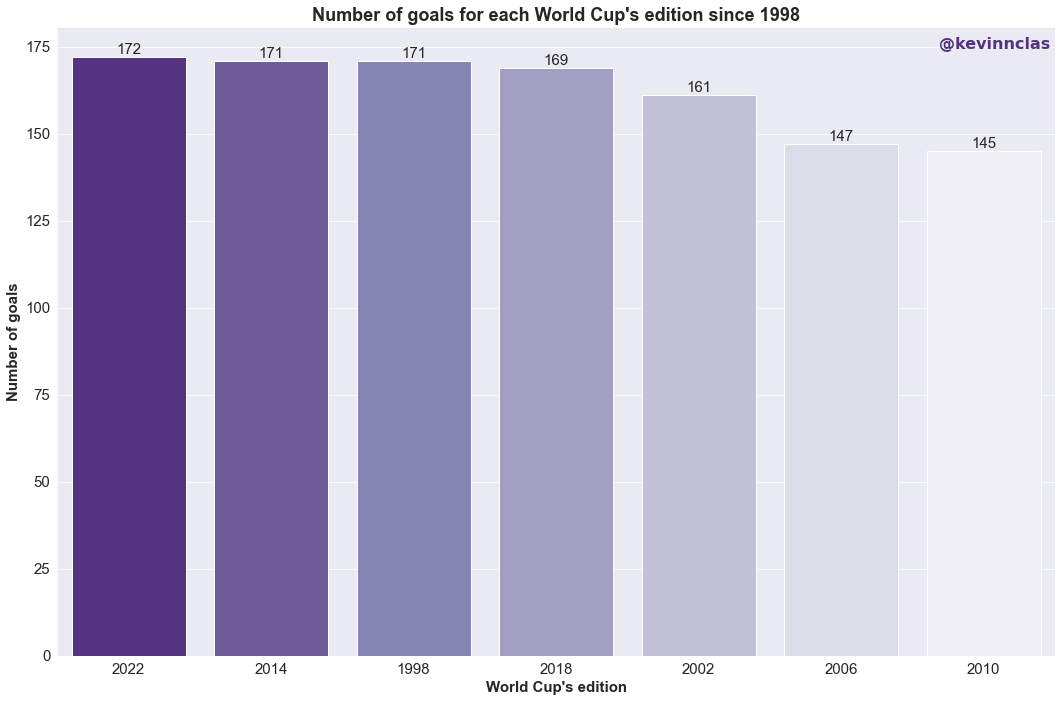

In [108]:
mpl.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10), tight_layout=True)
sns.set_style("darkgrid")

# create the bar plot
history_wc_plot = sns.barplot(x='Year', y='Goals', data=history_worldcups, palette=sns.color_palette("Purples", len(history_worldcups))[::-1], order = history_worldcups.sort_values(by='Goals', ascending=False)['Year'])

# loop through the bars, and add the value of 'Count' on the top of the bar
for i in history_wc_plot.containers:
    history_wc_plot.bar_label(i,)

# add labels and title
plt.xlabel("World Cup's edition").set_weight("bold")
plt.ylabel('Number of goals').set_weight("bold")
plt.title("Number of goals for each World Cup's edition since 1998").set_weight("bold")
plt.annotate("@kevinnclas", xy=(1, 1), xycoords='axes fraction', fontsize=16,
             xytext=(-5, -10), textcoords='offset points', fontweight='bold', fontfamily='Open Sans', color='#553280',
             ha='right', va='top')


# show the plot
plt.show()

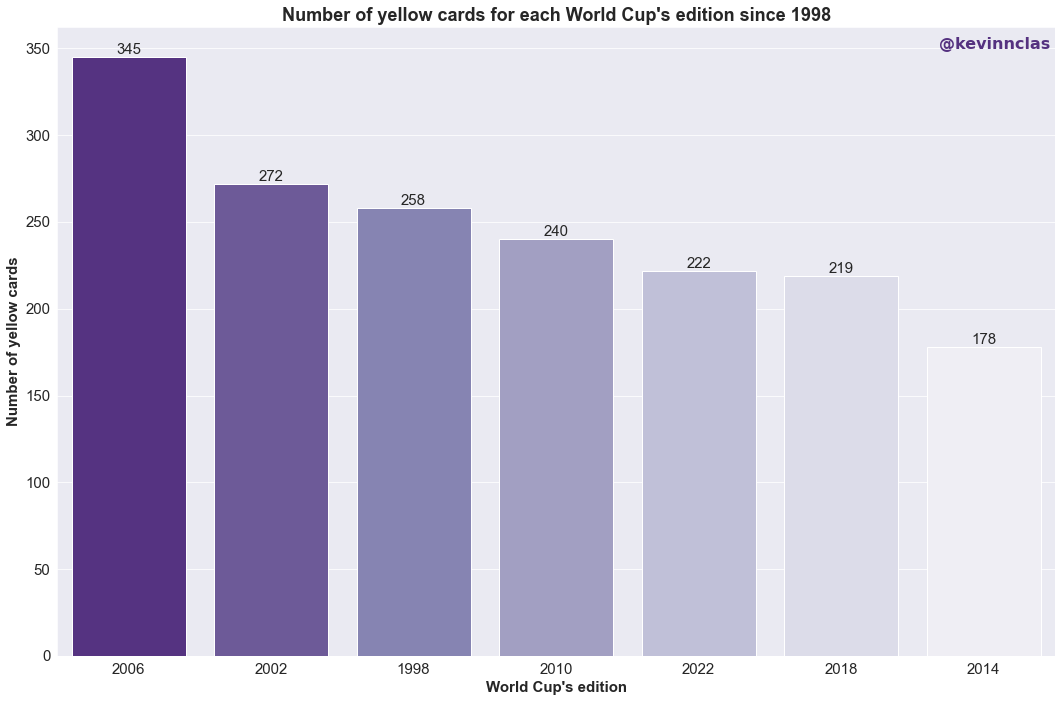

In [109]:
mpl.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10), tight_layout=True)
sns.set_style("darkgrid")

# create the bar plot
history_wc_plot = sns.barplot(x='Year', y='Yellow Cards', data=history_worldcups, palette=sns.color_palette("Purples", len(history_worldcups))[::-1], order = history_worldcups.sort_values(by='Yellow Cards', ascending=False)['Year'])

# loop through the bars, and add the value of 'Count' on the top of the bar
for i in history_wc_plot.containers:
    history_wc_plot.bar_label(i,)

# add labels and title
plt.xlabel("World Cup's edition").set_weight("bold")
plt.ylabel('Number of yellow cards').set_weight("bold")
plt.title("Number of yellow cards for each World Cup's edition since 1998").set_weight("bold")
plt.annotate("@kevinnclas", xy=(1, 1), xycoords='axes fraction', fontsize=16,
             xytext=(-5, -10), textcoords='offset points', fontweight='bold', fontfamily='Open Sans', color='#553280',
             ha='right', va='top')


# show the plot
plt.show()

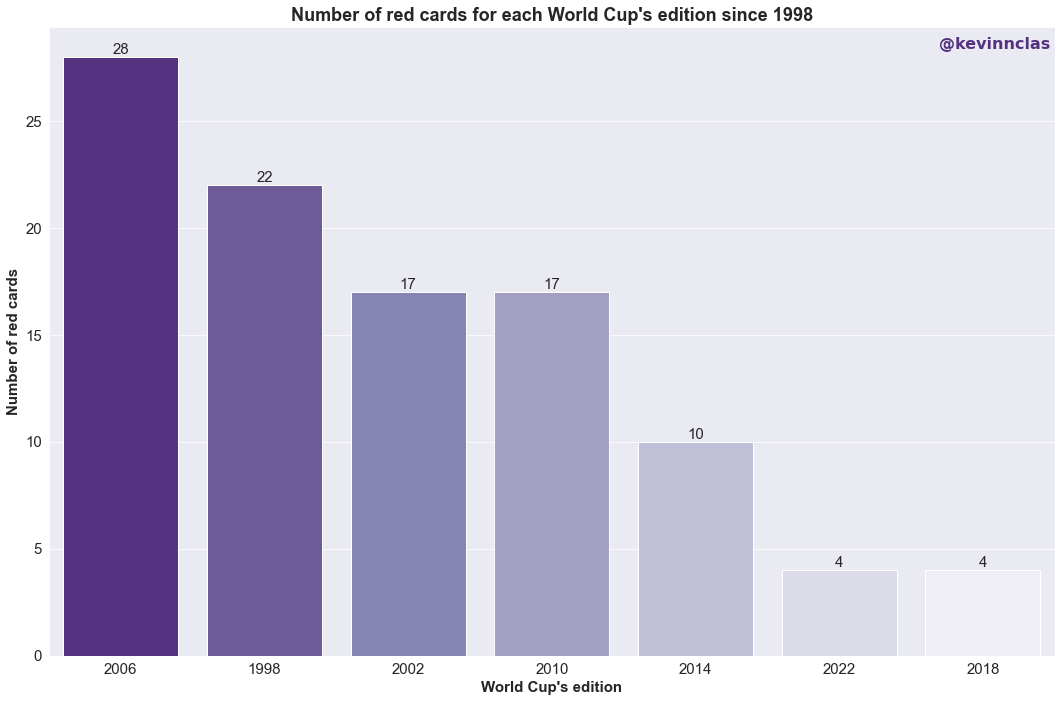

In [110]:
mpl.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10), tight_layout=True)
sns.set_style("darkgrid")

# create the bar plot
history_wc_plot = sns.barplot(x='Year', y='Red Cards', data=history_worldcups, palette=sns.color_palette("Purples", len(history_worldcups))[::-1], order = history_worldcups.sort_values(by='Red Cards', ascending=False)['Year'])

# loop through the bars, and add the value of 'Count' on the top of the bar
for i in history_wc_plot.containers:
    history_wc_plot.bar_label(i,)

# add labels and title
plt.xlabel("World Cup's edition").set_weight("bold")
plt.ylabel('Number of red cards').set_weight("bold")
plt.title("Number of red cards for each World Cup's edition since 1998").set_weight("bold")
plt.annotate("@kevinnclas", xy=(1, 1), xycoords='axes fraction', fontsize=16,
             xytext=(-5, -10), textcoords='offset points', fontweight='bold', fontfamily='Open Sans', color='#553280',
             ha='right', va='top')

# show the plot
plt.show()

In [111]:
participation_worldcup = worldcup_history[['Year', 'Asian Countries', 'American Coutries', 'European Countries', 'African Countries', 'Oceanic Countries']]
participation_worldcup = participation_worldcup[(participation_worldcup != 0).all(1)]
participation_worldcup

,Year,Asian Countries,American Coutries,European Countries,African Countries,Oceanic Countries
0,2022,2,3,8,2,1


---

## <span style="color:#fc0388">Tiredness and fragility of players</span>

During this 2022 edition, I noticed some specificities according to the form and **tiredness of the players**. In fact, this World Cup happened in the middle of a regular season, unlike the previous editions.

In [112]:
AT_teams_home = global_matches[global_matches['OrderTeam'] == "H"]
AT_teams_away = global_matches[global_matches['OrderTeam'] == "A"]
AT_each_match = pd.merge(AT_teams_home, AT_teams_away, how="left", on=["Match", "Stage", "Phase", "Additionnal time HT", "Additionnal time FT"])
additional_time_HT = AT_each_match["Additionnal time HT"].mean()
additional_time_FT = AT_each_match["Additionnal time FT"].mean()
mean_additional_time = additional_time_HT + additional_time_FT
print(mean_additional_time)

10.15625


In [113]:
total_additional_time = AT_each_match["Additionnal time HT"].sum() + AT_each_match["Additionnal time FT"].sum()
print(total_additional_time)

650


In [114]:
subs_injured = details_match[details_match['Nature'] == "Substitute Injury"]["Player"]
all_replaced_players = details_match[details_match['Nature'].isin(["Substitute Injury", "Substitute"])]["Player"]
rate_of_injured_players = round(subs_injured.count() / all_replaced_players.count() * 100, 2)
print(rate_of_injured_players,"%")

6.47 %


In [115]:
print("subs injured:", len(subs_injured), "// all subs:", len(all_replaced_players))

subs injured: 38 // all subs: 587


In [116]:
avg_goals_1st_half = global_matches["Goals MT"].mean()
avg_goals_2nd_half = global_matches["Goals 2MT"].mean()
print("Average goals score in the 1st half:\n", avg_goals_1st_half, "\n", "Average goals score in the 2nd half:\n", avg_goals_2nd_half)

Average goals score in the 1st half:
 0.515625 
 Average goals score in the 2nd half:
 0.796875
